In [1]:
import matplotlib.pyplot as plt
import os
from collections import Counter
from PIL import Image

# Importing Dataset

In [2]:
import zipfile

# Define the directory to extract the dataset
dataset_dir = "/content/waste_dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile('/content/waste_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print(f"Dataset extracted to: {dataset_dir}")

Dataset extracted to: /content/waste_dataset


In [3]:
DATA_DIR = "/content/waste_dataset/garbage_classification"

# Function to get image file paths and their corresponding classes
def get_image_classes(dataset_dir):
    image_classes = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                label = os.path.basename(root)  # Assuming folder name is the class label
                image_classes.append(label)
    return image_classes

# Count images per class
image_classes = get_image_classes(DATA_DIR)
class_distribution = Counter(image_classes)
print("Class distribution:", class_distribution)

Class distribution: Counter({'clothes': 5325, 'shoes': 1977, 'paper': 1050, 'biological': 985, 'battery': 945, 'cardboard': 891, 'plastic': 865, 'white-glass': 775, 'metal': 769, 'trash': 697, 'green-glass': 629, 'brown-glass': 607})


In [4]:
# Check image dimensions
image_dimensions = []
for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        if file.endswith(('.jpg', '.png')):
            img = Image.open(os.path.join(root, file))
            image_dimensions.append(img.size)

# Print some statistics on image dimensions
print("Image dimensions:", Counter(image_dimensions))

Image dimensions: Counter({(400, 533): 2590, (512, 384): 2358, (225, 225): 2004, (400, 534): 1077, (275, 183): 691, (259, 194): 550, (533, 400): 388, (400, 711): 300, (194, 259): 230, (534, 400): 163, (183, 275): 159, (300, 168): 156, (400, 400): 153, (224, 224): 95, (276, 183): 90, (711, 400): 86, (265, 190): 62, (260, 194): 53, (262, 192): 51, (264, 191): 51, (252, 200): 47, (268, 188): 45, (201, 251): 41, (299, 168): 41, (400, 532): 41, (274, 184): 40, (251, 201): 40, (263, 192): 38, (262, 193): 37, (259, 195): 36, (220, 220): 35, (225, 224): 33, (267, 189): 33, (266, 189): 33, (277, 182): 31, (318, 159): 31, (256, 197): 30, (246, 205): 29, (200, 200): 29, (271, 186): 28, (253, 199): 27, (224, 225): 27, (200, 252): 26, (189, 267): 26, (261, 193): 26, (217, 232): 25, (266, 190): 25, (290, 174): 25, (285, 177): 25, (270, 187): 25, (400, 712): 25, (258, 195): 24, (310, 163): 24, (197, 256): 23, (248, 203): 23, (280, 180): 23, (269, 187): 22, (196, 257): 22, (283, 178): 22, (238, 212): 

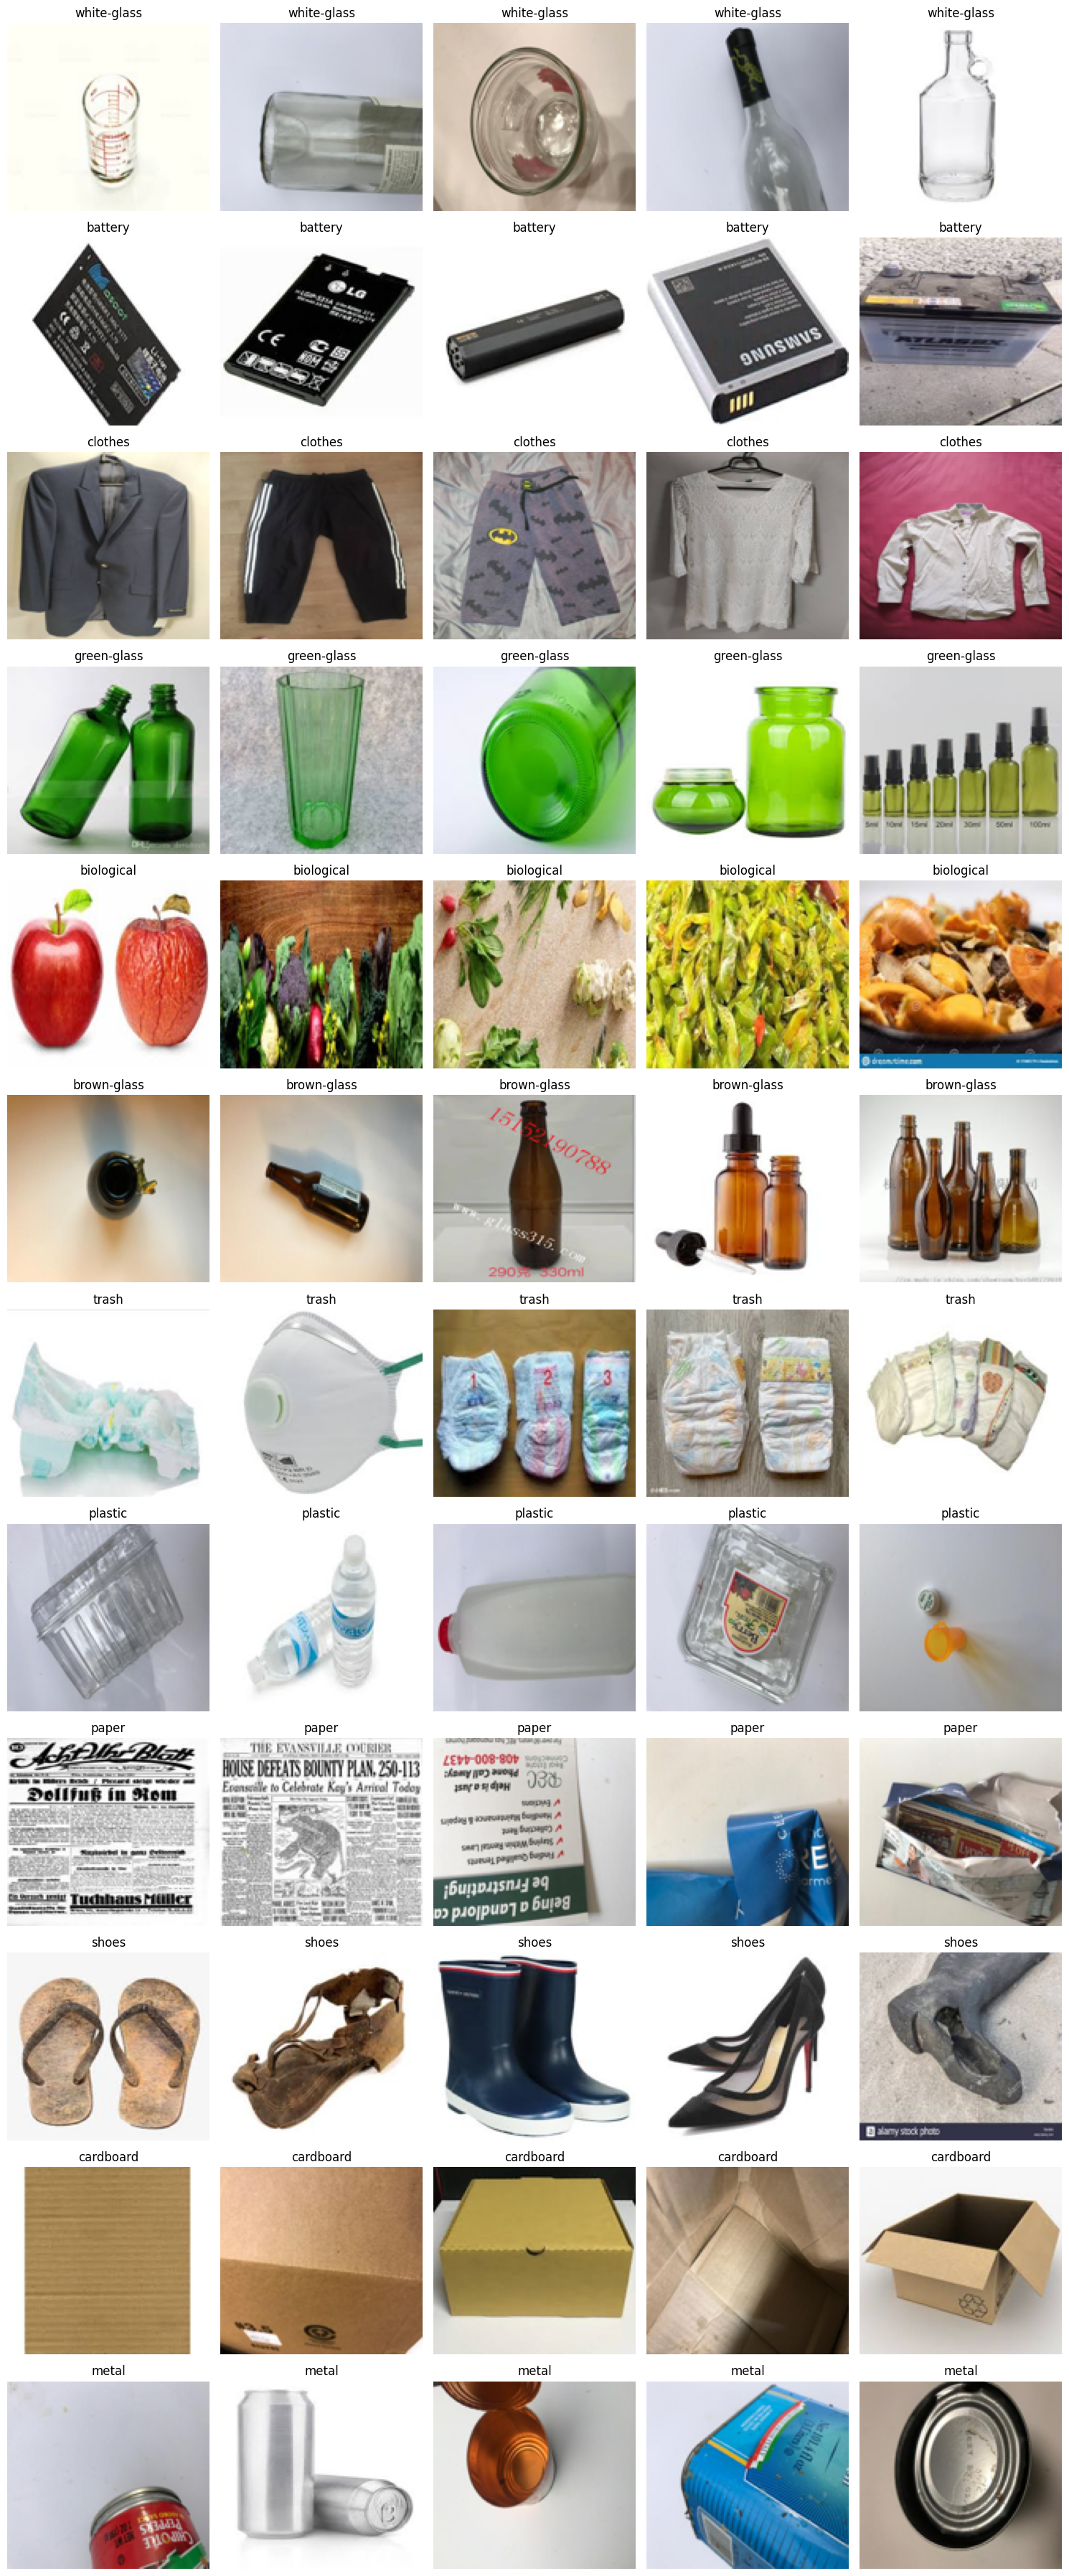

In [5]:
import random

# Function to plot random images from each class
def plot_random_images(dataset_dir, class_distribution, n_images=5):
    plt.figure(figsize=(n_images * 3, len(class_distribution) * 3))

    for i, (waste_class, _) in enumerate(class_distribution.items()):
        class_dir = os.path.join(dataset_dir, waste_class)
        images = [
            os.path.join(class_dir, img)
            for img in os.listdir(class_dir)
            if img.endswith(('.jpg', '.png'))
        ]

        # Ensure there are enough images to sample from
        if not images:
            print(f"Warning: No images found in {class_dir}")
            continue

        # Plot n_images random images for the current class
        for j in range(n_images):
            try:
                img_path = random.choice(images)
                img = Image.open(img_path)
                resized_img = img.resize((128, 128))

                ax = plt.subplot(len(class_distribution), n_images, i * n_images + j + 1)
                ax.imshow(resized_img, aspect='auto')
                ax.axis('off')

                # Set the title for the current image's subplot
                ax.set_title(waste_class, fontsize=12)

            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

    plt.tight_layout()
    plt.show()

plot_random_images(DATA_DIR, class_distribution)

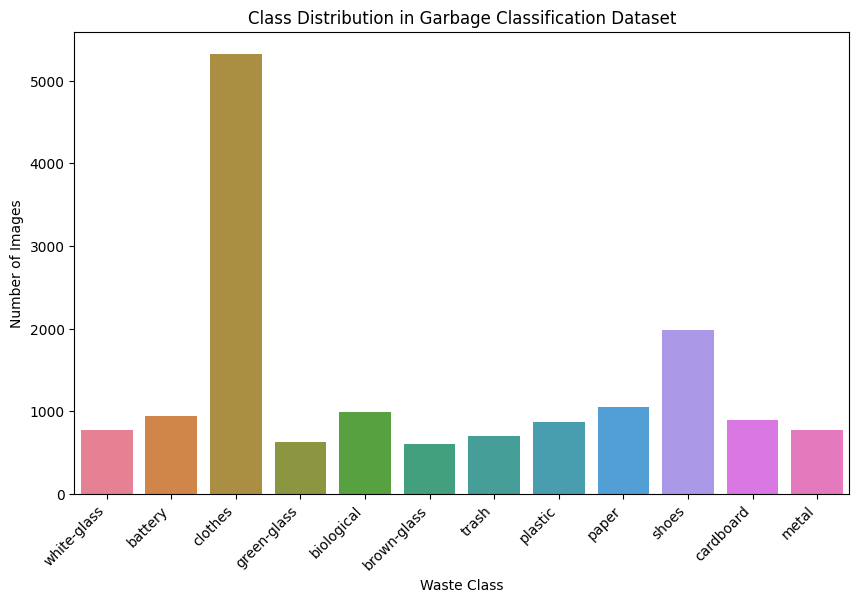

In [6]:
import seaborn as sns

class_labels = list(class_distribution.keys())
class_values = list(class_distribution.values())

plt.figure(figsize=(10, 6))
sns.barplot(
    x=class_labels,
    y=class_values,
    hue=class_labels
)
plt.title('Class Distribution in Garbage Classification Dataset')
plt.xlabel('Waste Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha="right")
plt.show()

In [7]:
class_distribution

Counter({'white-glass': 775,
         'battery': 945,
         'clothes': 5325,
         'green-glass': 629,
         'biological': 985,
         'brown-glass': 607,
         'trash': 697,
         'plastic': 865,
         'paper': 1050,
         'shoes': 1977,
         'cardboard': 891,
         'metal': 769})

In [8]:
sum(list(class_distribution.values()))

15515